# Continuous Control

---

This notebook uses the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

This notebook presents two agents along with their set of hyperparameter settings that have been identified in Parameter_Study.ipynb to achieve the target average score.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import sys
print(sys.version)

3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:56) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [2]:
!pip -q install ./python   # takes care of dependencies; for running in Udacity's workspace

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
from collections import deque
from ddpg_agent import Agent
from workspace_utils import active_session
from workspace_utils import keep_awake

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [4]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# env = UnityEnvironment(file_name="Reacher.app")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [8]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [9]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 5. Train the Agent 


In [10]:
def train(n_episodes=500, max_t=1000, path_name='checkpoint'):
    scores = []                        # list containing scores from each episode
    scores_deque = deque(maxlen=100)   # last 100 scores
    scores_deque_mean = []             # list containing the mean of trailing scores window from each episode
    solved = False                     # if the task has been solved / average score been achieved
    
    max_score = -np.Inf
    
    #for i_episode in range(1, n_episodes+1):
    for i_episode in keep_awake(range(1, n_episodes+1)):
        env_info = env.reset(train_mode=True)[brain_name]   # reset the environment
        state = env_info.vector_observations[0]             # get the current state
        
        agent.reset()
        
        score = 0
        #for t in range(max_t):
        for t in keep_awake(range(max_t)):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break 
                
        scores.append(score)
        scores_deque.append(score)
        scores_deque_mean.append(np.mean(scores_deque))
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 25 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), path_name + '_actor.pth')
            torch.save(agent.critic_local.state_dict(), path_name + '_critic.pth')
            solved = True
            break
        if i_episode > 100 and np.mean(scores_deque) < 5.0: # check if reasonable progress has been made
            print('\nGiving up: Already {:d} episodes!\tAnd Average Score only: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            print('\nNeed to look for another hyperparameter combination !')
            break
    return scores, scores_deque_mean, i_episode-100, solved



In [11]:
plt.rcParams.update({'font.size': 30})
def plot_scores(scores, scores_deque_mean, method, num_episodes_solved, solved=False, full_run=True):
    fig = plt.figure(figsize=(40, 20))
    ax = fig.add_subplot(111)
    if full_run:
        ax.axhline(y=30., xmin=0.0, xmax=1.0, color='r', linestyle='--', linewidth=2.0, dashes=(5, 10))
    if solved:
        ax.set_title('Scores and Mean of trailing scores window for ' + method + ' (solved in ' + str(num_episodes_solved) + ' episodes)')
    else:
        ax.set_title('Scores and Mean of trailing scores window for ' + method)
    plt.plot(np.arange(1, len(scores)+1), scores, label='scores')
    plt.plot(np.arange(1, len(scores_deque_mean)+1), scores_deque_mean, label='scores window mean', c='r', linewidth=2.0)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(loc='upper left');
    plt.show()
    fig.savefig('scores ' + method + '.png', format='png')


#### =====================================================================================================================

#### Below we present two agents along with their respective hyperparameter settings that were identified in Parameter_Study.ipynb and discussed in Report.pdf. These agents achieve the target average score of +30 after 216 and 180 episodes, respectively.

#### =====================================================================================================================


### Agent 1:

Below an agent that achieves the target average score after 216 episodes.

Episode 25	Average Score: 1.56	Score: 2.16
Episode 50	Average Score: 3.23	Score: 8.55
Episode 75	Average Score: 4.49	Score: 5.768
Episode 100	Average Score: 8.28	Score: 33.68
Episode 125	Average Score: 14.07	Score: 36.26
Episode 150	Average Score: 20.77	Score: 28.53
Episode 175	Average Score: 27.38	Score: 31.28
Episode 200	Average Score: 28.97	Score: 32.73
Episode 216	Average Score: 30.06	Score: 36.45
Environment solved in 116 episodes!	Average Score: 30.06
scores_mean[-1]: 30.06


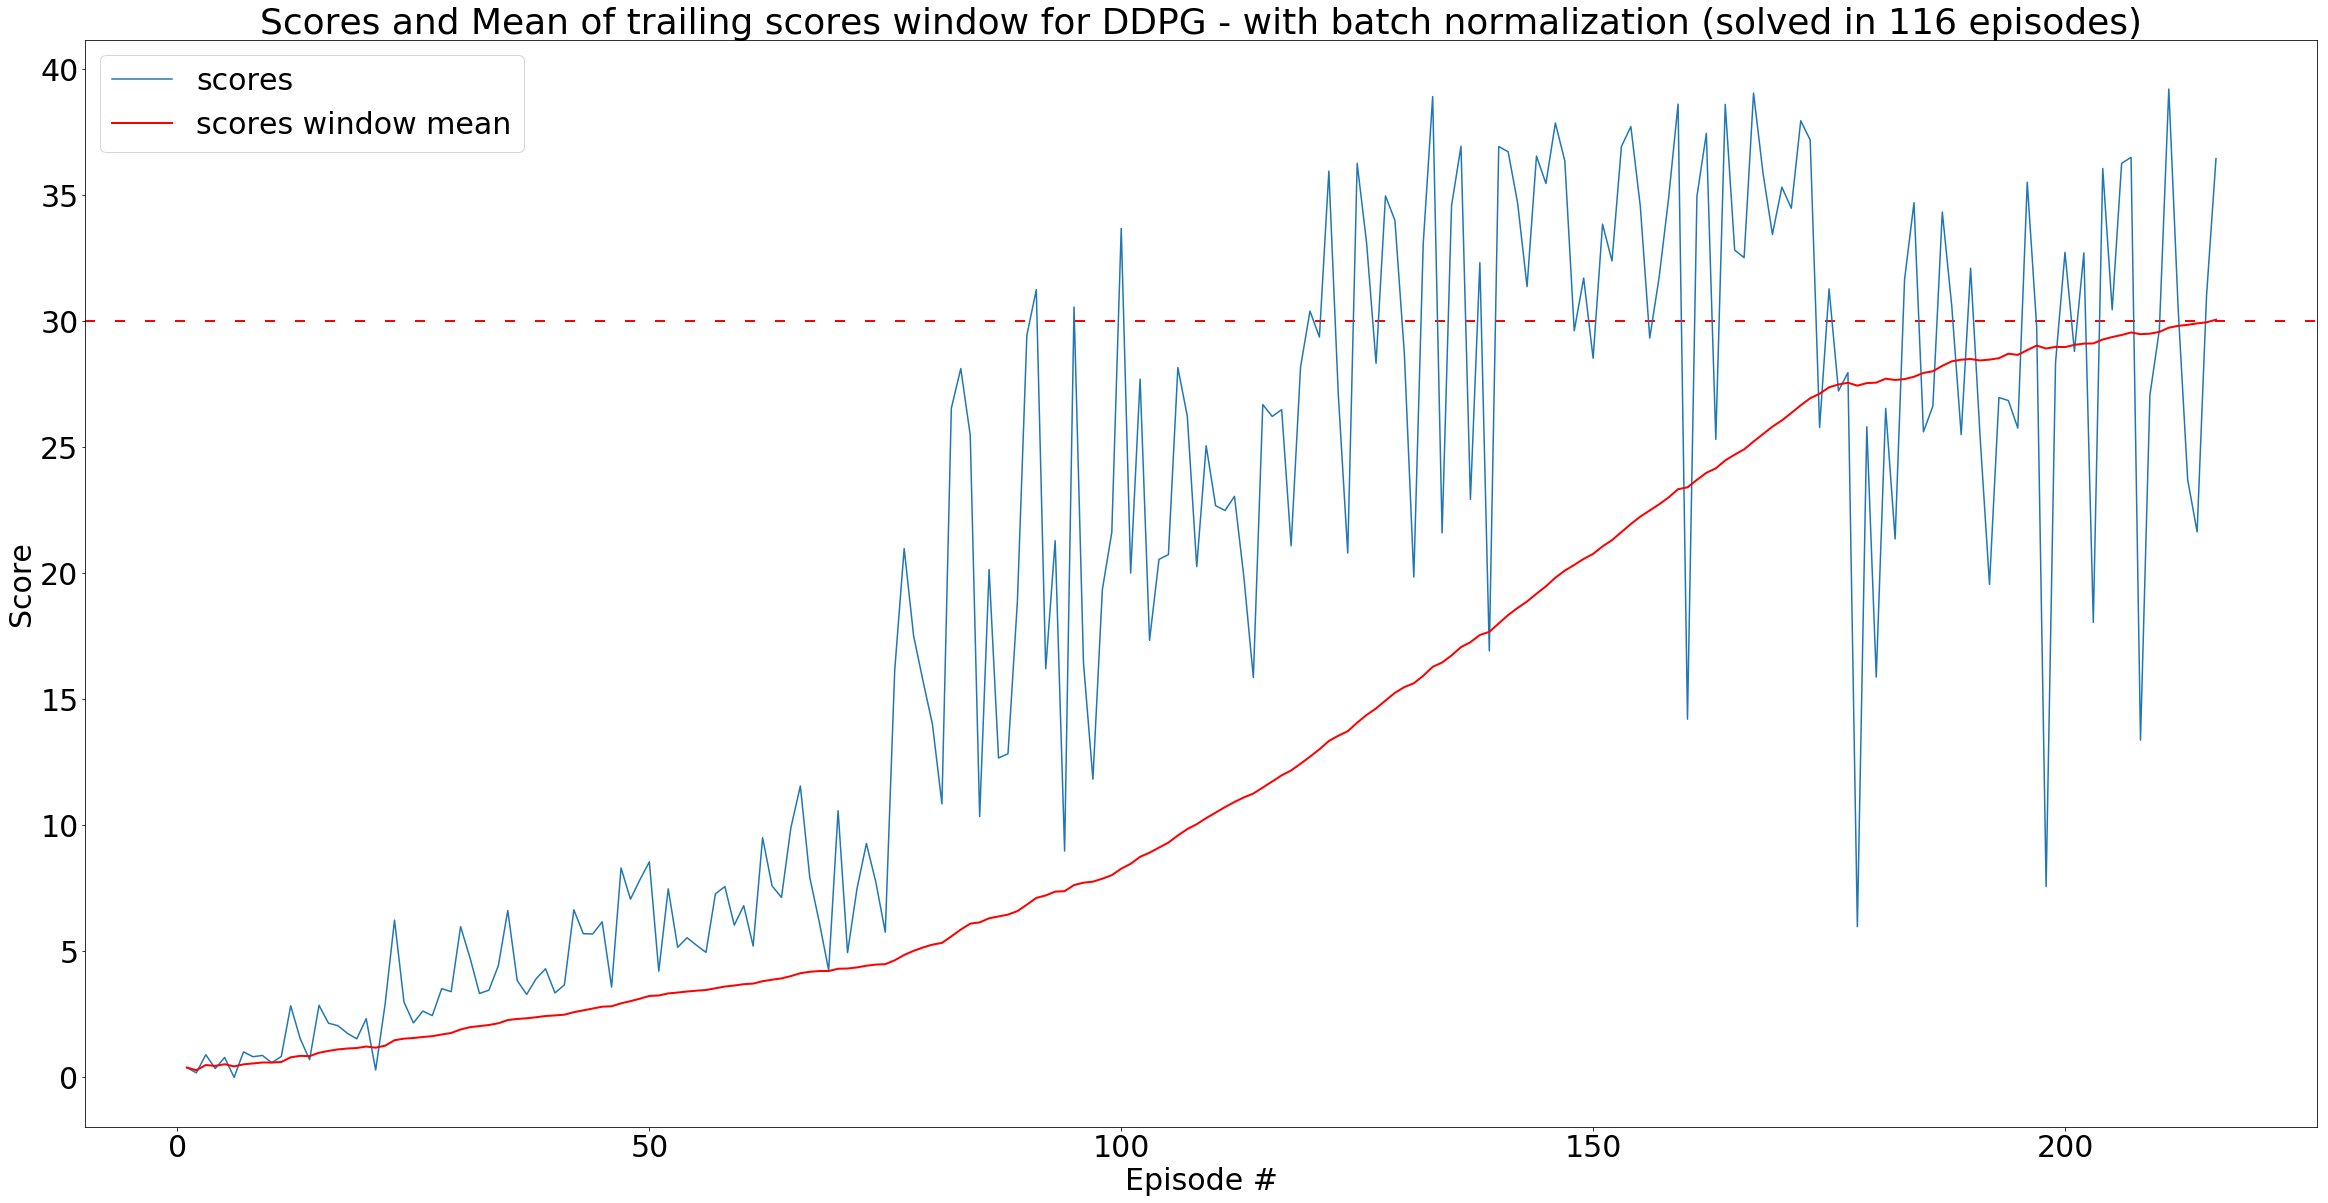

In [12]:
agent = Agent(state_size=state_size, action_size=action_size, 
              actor_fc1_units = 128,  actor_fc2_units = 128, 
              critic_fc1_units = 128, critic_fc2_units = 128,
              sigma = 0.05,
              LR_ACTOR = 5e-4, LR_CRITIC = 5e-4,
              use_BatchNorm=True)

with active_session():
    scores, scores_mean, num_episodes_solved, solved = train(n_episodes=500, path_name='checkpoint_03b')
    
print('\rscores_mean[-1]: {:.2f}'.format(scores_mean[-1]))
plot_scores(scores, scores_mean, 'DDPG - with batch normalization', num_episodes_solved, solved, full_run=True)



### Agent 2:

Below an agent that achieves the target average score after 180 episodes.

Episode 25	Average Score: 2.09	Score: 2.13
Episode 50	Average Score: 4.33	Score: 11.07
Episode 75	Average Score: 7.54	Score: 5.020
Episode 100	Average Score: 10.69	Score: 30.66
Episode 125	Average Score: 17.50	Score: 33.70
Episode 150	Average Score: 24.41	Score: 34.42
Episode 175	Average Score: 29.37	Score: 38.28
Episode 180	Average Score: 30.01	Score: 36.72
Environment solved in 80 episodes!	Average Score: 30.01
scores_deque_mean[-1]: 30.01


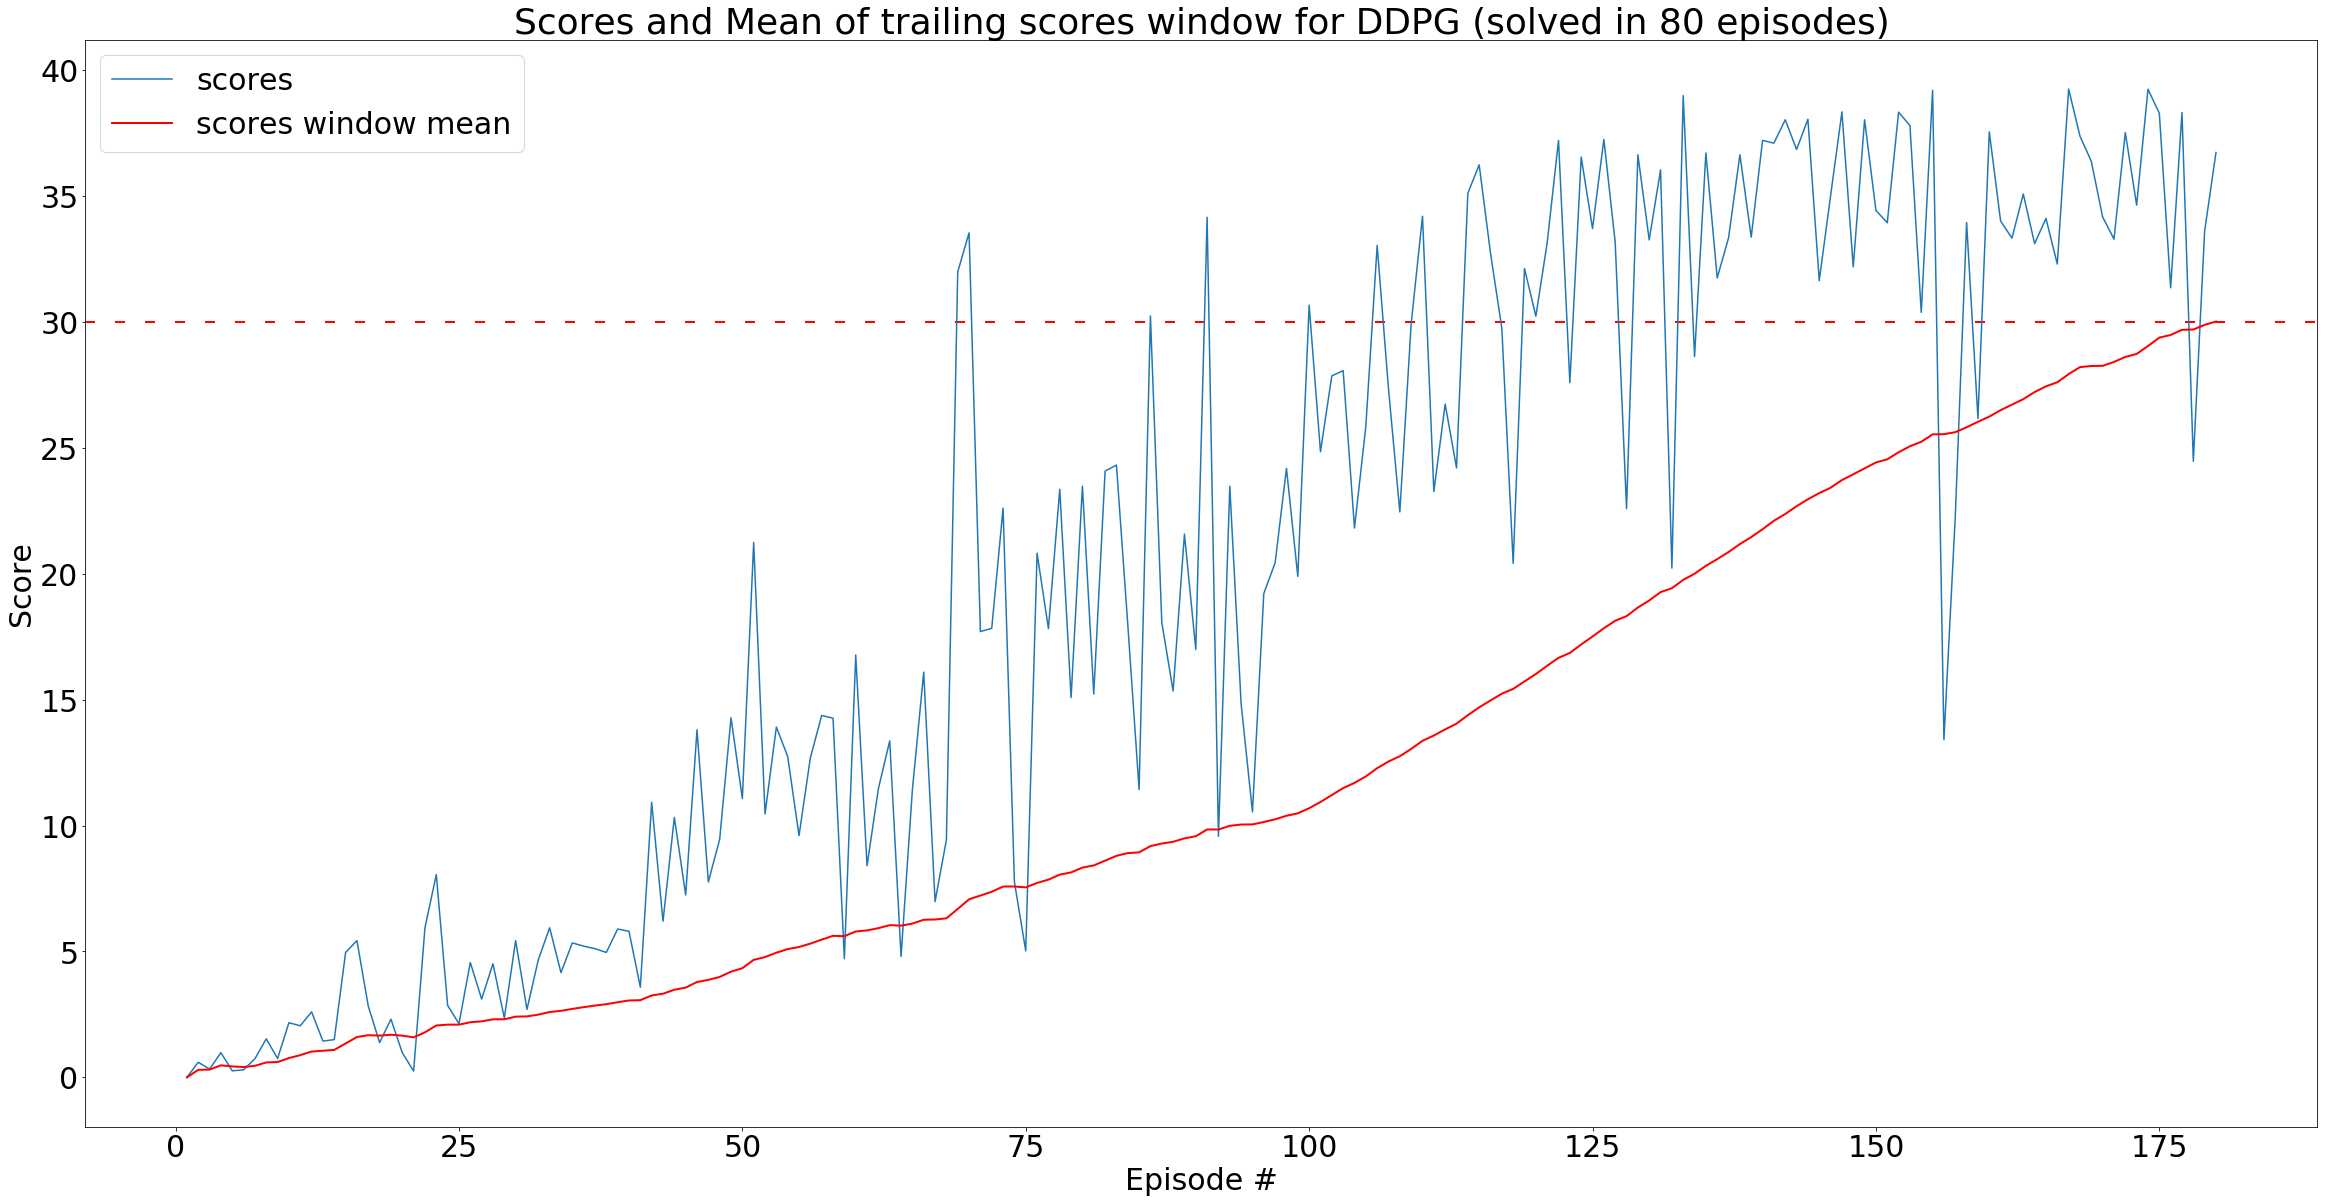

In [12]:
agent = Agent(state_size=state_size, action_size=action_size, 
              actor_fc1_units = 256, actor_fc2_units = 256, 
              critic_fc1_units = 256, critic_fc2_units = 256, 
              sigma = 0.05, 
              LR_ACTOR = 5e-4, LR_CRITIC = 5e-4,
              use_BatchNorm=True,
              use_clipping=False,
              BATCH_SIZE = 256)

with active_session():
    scores, scores_deque_mean, num_episodes_solved, solved = train(n_episodes=500, path_name='checkpoint')
    
print('\rscores_deque_mean[-1]: {:.2f}'.format(scores_deque_mean[-1]))
plot_scores(scores, scores_deque_mean, 'DDPG', num_episodes_solved, solved, full_run=True)


In [ ]:
  #  env.close()